# Four Lump Model 

##  File Name: param_estim_4lump.py

Author: Kalen S. Gabel

Date Due: Oct. 21st, 2020

The purpose of this function is to estimate parameters for a dynamic 4 lump model of a Fluid Catalytic Cracker.

# Equations 

$$ \frac{dy_1}{dt} = -(k_12 + k_13 + k_14)y_1^2 $$ 
$$ \frac{dy_2}{dt} = k_12y_1^2 - k_23y_2 - k24y_2 $$
$$ \frac{dy_3}{dt} = k_13y_1^2 + k_23y_2 $$
$$ \frac{dy_4}{dt} = k_14y_1^2 + k_24y_2 $$

### Packages 

In [11]:
import numpy as np
from scipy.optimize import curve_fit
from scipy.integrate import odeint
import matplotlib.pyplot as plt

### Data

In [12]:
xaxisData = np.array([0.01667, 0.03333, 0.05, 0.1])
yaxisData = np.array([[0.5074, 0.3796, 0.2882, 0.1762], [0.3767, 0.4385, 0.4865, 0.5416],
                      [0.0885, 0.1360, 0.1618, 0.2108], [0.0274, 0.0459, 0.0572, 0.0714]]) 

### Parameter Guesses

In [13]:
k12guess = 1.0
k13guess = 1.0
k14guess = 1.0
k23guess = 1.0
k24guess = 1.0

parameterguesses = np.array([k12guess, k13guess, k14guess, k23guess, k24guess])

### Defining the system of ODE's

In [14]:
def system_of_ODEs(y, t, parameters):  # yvar, xvar, args

    # unpack the parameters
    k12 = parameters[0]
    k13 = parameters[1]
    k14 = parameters[2]
    k23 = parameters[3]
    k24 = parameters[4]
    
    # unpack the dependent variables
    y1 = y[0]
    y2 = y[1]
    y3 = y[2]
    y4 = y[3]
    
    dy1dt = -(k12 + k13 + k14) * y1 ** 2
    dy2dt = k12 * y1 ** 2 - k23 * y2 - k24 * y2
    dy3dt = k13 * y1 ** 2 + k23 * y2
    dy4dt = k14 * y1 ** 2 + k24 * y2

    return dy1dt, dy2dt, dy3dt, dy4dt

### Defining the model

In [15]:
def model(xaxisData, *params):
    yaxis0 = np.array([1.0, 0.0, 0.0, 0.0])
    numYaxisVariables = 4
    yaxisCalc = np.zeros((xaxisData.size, numYaxisVariables))

    for i in np.arange(0, len(xaxisData)):
        if xaxisData[i] == 0.0: 
            yaxisCalc[i, :] = yaxis0
        else:
            xaxisSpan = np.linspace(0.0, xaxisData[i], 101)
            ySoln = odeint(system_of_ODEs, yaxis0, xaxisSpan, args=(params,))
            yaxisCalc[i, :] = ySoln[-1, :]
    yaxisOutput = np.transpose(yaxisCalc)
    yaxisOutput = np.ravel(yaxisOutput)
    return yaxisOutput

### Plotting

In [16]:
parametersoln, pcov = curve_fit(model, xaxisData, np.ravel(yaxisData), p0=parameterguesses)

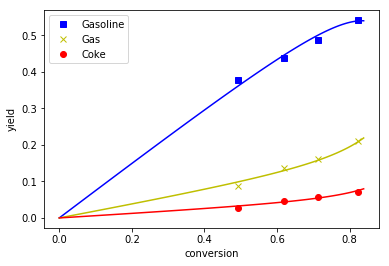

In [17]:
xdataConversion = 1 - yaxisData[0, :]
plt.plot(xdataConversion, yaxisData[1, :], 'bs')
plt.plot(xdataConversion, yaxisData[2, :], 'yx')
plt.plot(xdataConversion, yaxisData[3, :], 'ro')
plt.legend(['Gasoline', 'Gas','Coke'])

yaxis0 = np.array([1.0, 0.0, 0.0,0.0])  # should include a decimal
numYaxisVariables = 4

xaxisForPlotting = np.linspace(0, xaxisData[-1], 101)

yaxisCalc_OptionB = odeint(system_of_ODEs, yaxis0, xaxisForPlotting, args=(parametersoln,))
Conversion = 1 - yaxisCalc_OptionB[:, 0]
plt.plot(Conversion, yaxisCalc_OptionB[:, 1], 'b-')
plt.plot(Conversion, yaxisCalc_OptionB[:, 2], 'y-')
plt.plot(Conversion, yaxisCalc_OptionB[:, 3], 'r-')
plt.xlabel('conversion')
plt.ylabel('yield')
plt.show()

#### Figure 1: Displays the weight fraction of each species verses conversion fraction

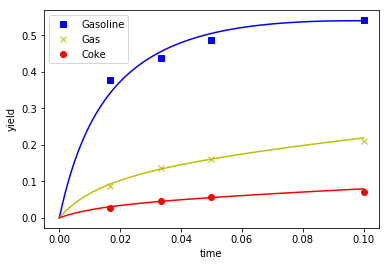

In [18]:
# this plots yi verses time
plt.plot(xaxisData, yaxisData[1, :], 'bs')
plt.plot(xaxisData, yaxisData[2, :], 'yx')
plt.plot(xaxisData, yaxisData[3, :], 'ro')
plt.plot(xaxisForPlotting, yaxisCalc_OptionB[:, 1], 'b-')
plt.plot(xaxisForPlotting, yaxisCalc_OptionB[:, 2], 'y-')
plt.plot(xaxisForPlotting, yaxisCalc_OptionB[:, 3], 'r-')
plt.legend(['Gasoline', 'Gas','Coke'])
plt.xlabel('time')
plt.ylabel('yield')

plt.show()

#### Figure 2: Displays the weight fraction of each species verses time

## Printing the results for parameter estimation  

In [19]:
print('The value for k12 is:',parametersoln[0])
print('The value for k13 is:',parametersoln[1])
print('The value for k14 is:',parametersoln[2])
print('The value for k23 is:',parametersoln[3])
print('The value for k24 is:',parametersoln[4])

The value for k12 is: 39.0621668791492
The value for k13 is: 9.849884642644604
The value for k14 is: 3.1818819598607497
The value for k23 is: 1.3477738015937613
The value for k24 is: 0.6356638545088025


## End of Documentation